<a href="https://colab.research.google.com/github/Thanishka1205/autism_prediction/blob/main/autism_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

In [ ]:
df=pd.read_csv("/content/autism.csv")

In [ ]:
df["age"]=df["age"].astype(int)

In [ ]:
df=df.drop(columns=["ID"])

In [ ]:
null_count = df.isnull().sum()
print(null_count)


A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
relation           0
Class/ASD          0
dtype: int64


In [ ]:
unique=df.nunique()
print(unique)

A1_Score             2
A2_Score             2
A3_Score             2
A4_Score             2
A5_Score             2
A6_Score             2
A7_Score             2
A8_Score             2
A9_Score             2
A10_Score            2
age                 79
gender               2
ethnicity           12
jaundice             2
austim               2
contry_of_res       56
used_app_before      2
result             800
relation             6
Class/ASD            2
dtype: int64


In [ ]:
unique=df['ethnicity'].unique()
print(unique)


['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']


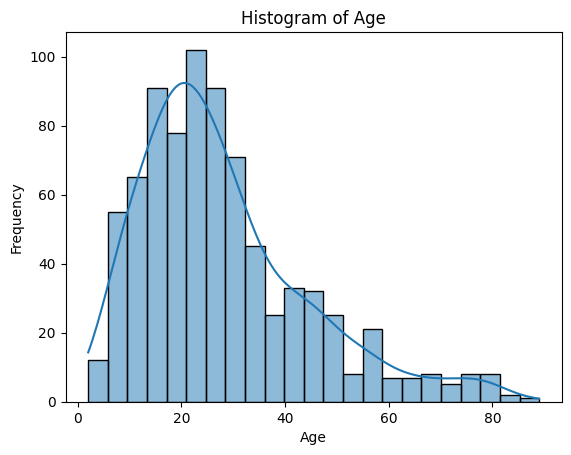

In [ ]:
#histogram for finding skewness
sns.histplot(df['age'],kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()


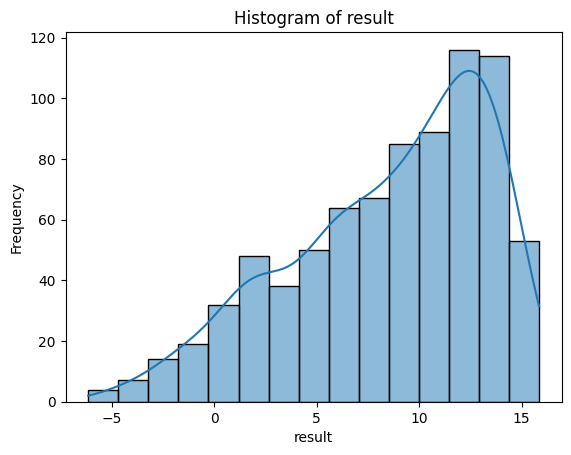

In [ ]:
sns.histplot(df['result'],kde=True)
plt.xlabel('result')
plt.ylabel('Frequency')
plt.title('Histogram of result')
plt.show()


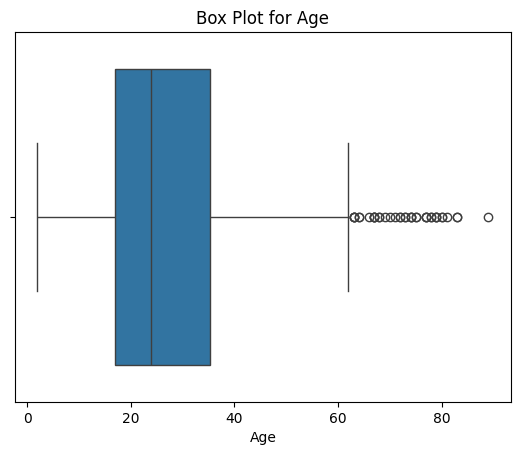

In [ ]:
# box plot to identify outliers
sns.boxplot(x=df["age"])
plt.title("Box Plot for Age")
plt.xlabel("Age")
plt.show()

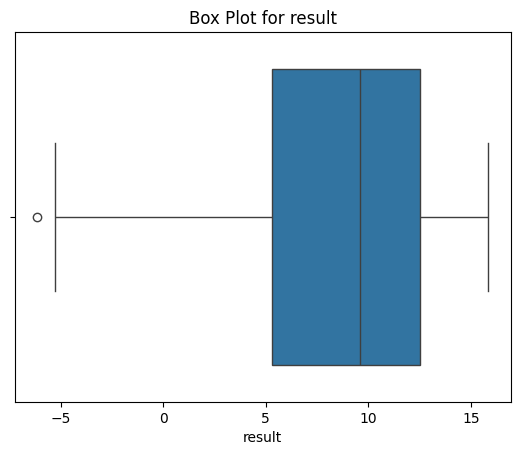

In [ ]:
# box plot
sns.boxplot(x=df["result"])
plt.title("Box Plot for result")
plt.xlabel("result")
plt.show()

In [ ]:
df["Class/ASD"].value_counts()

,count
Class/ASD,
0,639
1,161


In [ ]:
df["ethnicity"] = df["ethnicity"].replace({"?": "Others", "others": "Others"})

In [ ]:
df["relation"] = df["relation"].replace(
    {"?": "Others",
     "Relative": "Others",
     "Parent": "Others",
     "Health care professional": "Others"}
)

In [ ]:


categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate over categorical columns and apply Label Encoding
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
# function to replace the outliers with mean
def replace_outliers_with_mean(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  mean = df[column].mean()

  # replace outliers with mean value
  df[column] = df[column].apply(lambda x: mean if x < lower_bound or x > upper_bound else x)

  return df

In [ ]:
# replace outliers in the "age" column
df = replace_outliers_with_mean(df, "age")

# replace outliers in the "result" column
df = replace_outliers_with_mean(df, "result")

In [ ]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,7,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,25,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,54,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,5,0,0,54,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,46,0,-4.777286,1,0


In [ ]:
#Over sampling
smote = SMOTE(random_state=42)
X = df.drop(columns=["Class/ASD"])
y = df["Class/ASD"]
X_resampled, y_resampled = smote.fit_resample(X, y)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print(y_train.shape)
print(y_test.shape)

(1022,)
(256,)


In [ ]:
#Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X_resampled and y_resampled are your balanced data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes model
nb_model = GaussianNB()

# Fit the model to the training data
nb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb_model.predict(X_test)

# Predict on the training data to get y_train_pred
y_train_pred = nb_model.predict(X_train) # This line is added to get predictions for the training set

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.8385518590998043
Test Accuracy: 0.7890625


In [ ]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred_rf = rf_model.predict(X_train)

# Calculate training accuracy
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
print(f"Training Accuracy (Random Forest): {train_accuracy_rf}")

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Test Accuracy (Random Forest): {accuracy_rf}")





Training Accuracy (Random Forest): 1.0
Test Accuracy (Random Forest): 0.890625


In [ ]:
#SVM Model
from sklearn.svm import SVC

# Create an SVM model
svm_model = SVC(random_state=42)

# Fit the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Test Accuracy (SVM): {accuracy_svm}")
accuracy_train_svm = accuracy_score(y_train, svm_model.predict(X_train))
print(f"Training Accuracy (SVM): {accuracy_train_svm}")
# (Use accuracy_score, precision_score, recall_score, etc., as before)

Test Accuracy (SVM): 0.7890625
Training Accuracy (SVM): 0.8326810176125244


In [ ]:
#Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate
accuracy_train_dt = accuracy_score(y_train, dt_model.predict(X_train))
print(f"Training Accuracy (Decision Tree): {accuracy_train_dt}")
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Test Accuracy (Decision Tree): {accuracy_dt}")

# (Use accuracy_score, precision_score, recall_score, etc., as before)

Training Accuracy (Decision Tree): 1.0
Test Accuracy (Decision Tree): 0.84765625
